In [1]:
# 필요 라이브러리 로드
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import geopandas as gpd
import numpy as np
import folium

%matplotlib inline
from scipy import stats
from scipy.stats import shapiro
import seaborn as sns
import warnings
import matplotlib.cm as cm
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['font.family']='Malgun Gothic'
%matplotlib inline
from matplotlib import dates


#그래프에서 마이너스 기호가 표시되게 하는 설정입니다.
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
df = pd.read_csv('최종데이터/전체데이터_독립+종속_1719.csv')
df

,police,year,범죄발생_강도,범죄발생_살인,범죄발생_강간/강제추행,범죄검거_강간/강제추행,범죄검거_강도,범죄검거_살인,acc_case,경찰 수,...,1인_남성비율,1인_1230비율,1인_450비율,1인_60이상비율,rob_safety_q1,mur_safety_q2,ta_safety_q3,law_order_q4,overall_q5,천명당_범죄발생_강도살인
0,마산동부경찰서,0,0,0,5,5,0,0,30,185,...,0.486883,0.206844,0.384428,0.408728,74.6,77.0,64.0,65.7,71.2,0.000000
1,마산동부경찰서,1,0,0,6,5,0,0,36,185,...,0.486057,0.202366,0.378386,0.419148,71.7,73.5,64.9,63.6,70.3,0.000000
2,마산동부경찰서,2,0,0,5,4,0,0,34,185,...,0.485276,0.197967,0.372415,0.429618,76.0,79.0,67.5,70.0,72.6,0.000000
3,마산동부경찰서,3,0,0,6,6,0,0,31,185,...,0.480842,0.194158,0.362228,0.443564,72.4,75.6,67.9,70.7,71.8,0.000000
4,마산동부경찰서,4,0,0,7,6,0,0,36,185,...,0.476514,0.190448,0.352172,0.457380,76.1,78.2,66.4,69.9,72.4,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,창원중부경찰서,1,0,0,11,11,0,0,56,201,...,0.541299,0.370192,0.392009,0.237613,76.8,78.9,69.2,65.6,72.5,0.000000
242,창원중부경찰서,2,1,0,8,6,1,0,56,201,...,0.539119,0.368224,0.388149,0.243536,78.0,80.1,65.3,68.6,72.9,0.002842
243,창원중부경찰서,3,1,0,6,6,1,0,58,201,...,0.536059,0.366321,0.384365,0.249135,75.7,77.7,67.8,70.6,74.2,0.002858
244,창원중부경찰서,4,0,0,8,7,0,0,52,201,...,0.533222,0.364551,0.380760,0.254630,80.8,82.8,69.4,73.8,76.1,0.000000


In [3]:
yay = ['police','ta_safety_q3','year','경찰 수/면적','남성비율','외국인_남성비율','기초생활수급_비율','천명당_유흥업소수',
 '천명당_cctv수', '천명당_교통사고수','천명당_신고_교통불편','면적당_보안등수','천명당_신고_교통사고','천명당_신고_교통위반','천명당_보안등수',
 '천명당_공원수']

In [4]:
df = df[yay]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   police        246 non-null    object 
 1   ta_safety_q3  246 non-null    float64
 2   year          246 non-null    int64  
 3   경찰 수/면적       246 non-null    float64
 4   남성비율          246 non-null    float64
 5   외국인_남성비율      246 non-null    float64
 6   기초생활수급_비율     246 non-null    float64
 7   천명당_유흥업소수     246 non-null    float64
 8   천명당_cctv수     246 non-null    float64
 9   천명당_교통사고수     246 non-null    float64
 10  천명당_신고_교통불편   246 non-null    float64
 11  면적당_보안등수      246 non-null    float64
 12  천명당_신고_교통사고   246 non-null    float64
 13  천명당_신고_교통위반   246 non-null    float64
 14  천명당_보안등수      246 non-null    float64
 15  천명당_공원수       246 non-null    float64
dtypes: float64(14), int64(1), object(1)
memory usage: 30.9+ KB


In [6]:
df2 = df.iloc[:,1:]
df2

,ta_safety_q3,year,경찰 수/면적,남성비율,외국인_남성비율,기초생활수급_비율,천명당_유흥업소수,천명당_cctv수,천명당_교통사고수,천명당_신고_교통불편,면적당_보안등수,천명당_신고_교통사고,천명당_신고_교통위반,천명당_보안등수,천명당_공원수
0,64.0,0,2.003503,0.502356,0.590253,0.023321,1.621776,2.873847,0.147882,1.049965,61.155591,1.355588,0.133094,27.836383,0.320412
1,64.9,1,2.003503,0.502130,0.586282,0.023653,1.647751,3.445297,0.179755,1.063548,61.155591,1.373126,0.134816,28.196512,0.324557
2,67.5,2,2.003503,0.501900,0.582671,0.023684,1.674398,4.350399,0.171993,1.077483,61.155591,1.391116,0.136582,28.565936,0.328809
3,67.9,3,2.003503,0.501292,0.571631,0.025371,1.696879,4.706148,0.158922,0.968913,61.155591,1.496945,0.205061,28.949473,0.333224
4,66.4,4,2.003503,0.500665,0.561129,0.028340,1.725159,5.570394,0.187065,1.080823,61.155591,1.735552,0.290991,29.343296,0.337757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,69.2,1,2.093127,0.517705,0.684990,0.020186,1.559960,2.329996,0.159122,0.454633,30.147271,1.042815,0.130707,8.226021,0.386438
242,65.3,2,2.093127,0.517443,0.675265,0.019960,1.568810,2.540790,0.159155,0.454728,30.147271,1.043031,0.130734,8.227728,0.386518
243,67.8,3,2.093127,0.517118,0.668878,0.021211,1.589003,2.800760,0.165759,0.411540,30.147271,1.111730,0.154328,8.273674,0.388677
244,69.4,4,2.093127,0.516796,0.662661,0.023512,1.600805,3.672942,0.149447,0.505820,30.147271,1.293289,0.235666,8.320161,0.390861


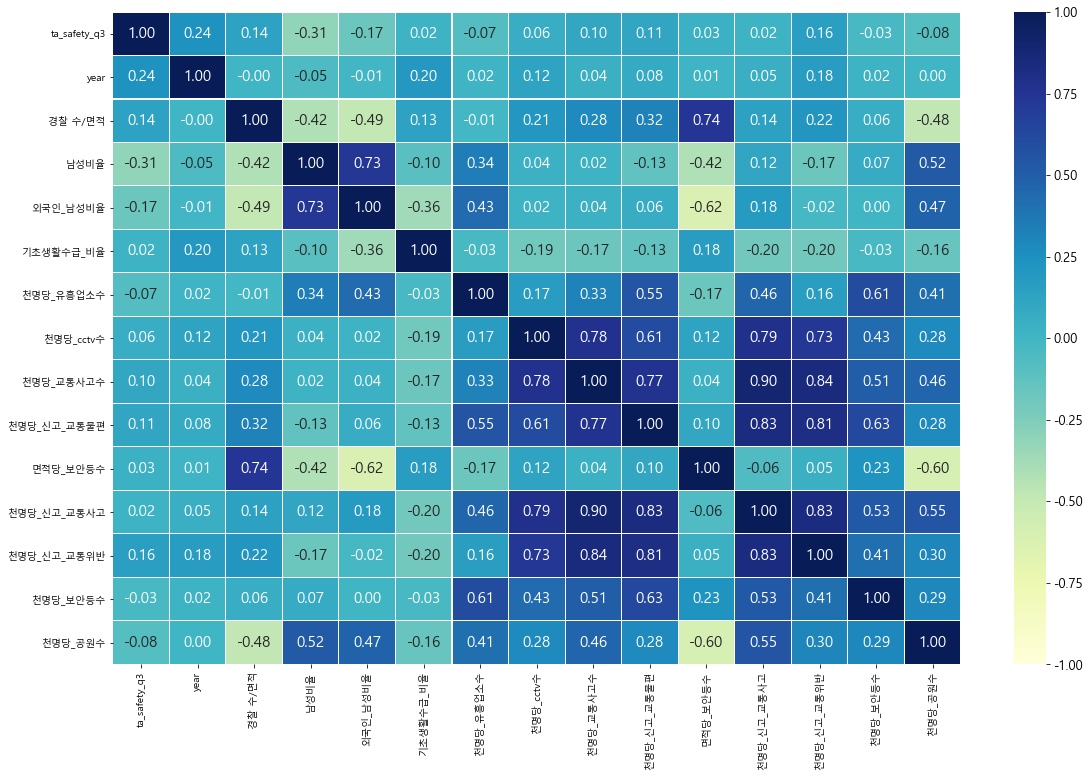

In [7]:
# 히트맵을 이용한 상관분석
plt.figure(figsize=(19,12))
ax = sns.heatmap(data=df2.corr(), annot=True, fmt = '.2f', linewidths=.10, cmap='YlGnBu', vmin = -1, vmax=1,annot_kws={"size": 15})
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=13)
# ax.set_xlabels(fontsize=10)
# plt.title('변수 간 상관계수 히트맵')
plt.show()

In [8]:
# StandardScaler 
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [9]:
df2.iloc[:,1:]

,year,경찰 수/면적,남성비율,외국인_남성비율,기초생활수급_비율,천명당_유흥업소수,천명당_cctv수,천명당_교통사고수,천명당_신고_교통불편,면적당_보안등수,천명당_신고_교통사고,천명당_신고_교통위반,천명당_보안등수,천명당_공원수
0,0,2.003503,0.502356,0.590253,0.023321,1.621776,2.873847,0.147882,1.049965,61.155591,1.355588,0.133094,27.836383,0.320412
1,1,2.003503,0.502130,0.586282,0.023653,1.647751,3.445297,0.179755,1.063548,61.155591,1.373126,0.134816,28.196512,0.324557
2,2,2.003503,0.501900,0.582671,0.023684,1.674398,4.350399,0.171993,1.077483,61.155591,1.391116,0.136582,28.565936,0.328809
3,3,2.003503,0.501292,0.571631,0.025371,1.696879,4.706148,0.158922,0.968913,61.155591,1.496945,0.205061,28.949473,0.333224
4,4,2.003503,0.500665,0.561129,0.028340,1.725159,5.570394,0.187065,1.080823,61.155591,1.735552,0.290991,29.343296,0.337757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,1,2.093127,0.517705,0.684990,0.020186,1.559960,2.329996,0.159122,0.454633,30.147271,1.042815,0.130707,8.226021,0.386438
242,2,2.093127,0.517443,0.675265,0.019960,1.568810,2.540790,0.159155,0.454728,30.147271,1.043031,0.130734,8.227728,0.386518
243,3,2.093127,0.517118,0.668878,0.021211,1.589003,2.800760,0.165759,0.411540,30.147271,1.111730,0.154328,8.273674,0.388677
244,4,2.093127,0.516796,0.662661,0.023512,1.600805,3.672942,0.149447,0.505820,30.147271,1.293289,0.235666,8.320161,0.390861


In [10]:
scaler = StandardScaler()
scaler.fit(df2.iloc[:,1:])
df2_scaled = scaler.transform(df2.iloc[:,1:])
df2_scaled = pd.DataFrame(df2_scaled, index=df2.iloc[:,1:].index, columns=df2.iloc[:,1:].columns)
df2_scaled

,year,경찰 수/면적,남성비율,외국인_남성비율,기초생활수급_비율,천명당_유흥업소수,천명당_cctv수,천명당_교통사고수,천명당_신고_교통불편,면적당_보안등수,천명당_신고_교통사고,천명당_신고_교통위반,천명당_보안등수,천명당_공원수
0,-1.46385,-1.229674,0.961697,1.330305,-0.334887,1.123087,-1.071395,-1.080133,0.316541,-1.199226,-0.333577,-1.216560,0.148633,0.202354
1,-0.87831,-1.229674,0.941864,1.274584,-0.297609,1.157690,-0.967970,-0.938271,0.341496,-1.199226,-0.315960,-1.211151,0.174046,0.221072
2,-0.29277,-1.229674,0.921732,1.223929,-0.294049,1.193189,-0.804159,-0.972820,0.367095,-1.199226,-0.297887,-1.205604,0.200115,0.240272
3,0.29277,-1.229674,0.868567,1.069018,-0.104465,1.223139,-0.739773,-1.030995,0.167639,-1.199226,-0.191578,-0.990521,0.227179,0.260206
4,0.87831,-1.229674,0.813727,0.921650,0.229262,1.260814,-0.583356,-0.905731,0.373231,-1.199226,0.048113,-0.720626,0.254970,0.280675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,-0.87831,-1.222024,2.304677,2.659605,-0.687279,1.040736,-1.169825,-1.030107,-0.777156,-1.351504,-0.647770,-1.224057,-1.235190,0.500487
242,-0.29277,-1.222024,2.281748,2.523152,-0.712682,1.052526,-1.131674,-1.029960,-0.776982,-1.351504,-0.647553,-1.223972,-1.235069,0.500849
243,0.29277,-1.222024,2.253262,2.433525,-0.571990,1.079426,-1.084623,-1.000564,-0.856323,-1.351504,-0.578542,-1.149868,-1.231827,0.510595
244,0.87831,-1.222024,2.225089,2.346304,-0.313424,1.095149,-0.926770,-1.073169,-0.683120,-1.351504,-0.396159,-0.894394,-1.228547,0.520456


In [11]:
# 통계 및 회귀 분석
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.ensemble import VotingClassifier
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error

In [12]:
# 정답 제거
df2_scaled_data = df2_scaled
df2_scaled_data

,year,경찰 수/면적,남성비율,외국인_남성비율,기초생활수급_비율,천명당_유흥업소수,천명당_cctv수,천명당_교통사고수,천명당_신고_교통불편,면적당_보안등수,천명당_신고_교통사고,천명당_신고_교통위반,천명당_보안등수,천명당_공원수
0,-1.46385,-1.229674,0.961697,1.330305,-0.334887,1.123087,-1.071395,-1.080133,0.316541,-1.199226,-0.333577,-1.216560,0.148633,0.202354
1,-0.87831,-1.229674,0.941864,1.274584,-0.297609,1.157690,-0.967970,-0.938271,0.341496,-1.199226,-0.315960,-1.211151,0.174046,0.221072
2,-0.29277,-1.229674,0.921732,1.223929,-0.294049,1.193189,-0.804159,-0.972820,0.367095,-1.199226,-0.297887,-1.205604,0.200115,0.240272
3,0.29277,-1.229674,0.868567,1.069018,-0.104465,1.223139,-0.739773,-1.030995,0.167639,-1.199226,-0.191578,-0.990521,0.227179,0.260206
4,0.87831,-1.229674,0.813727,0.921650,0.229262,1.260814,-0.583356,-0.905731,0.373231,-1.199226,0.048113,-0.720626,0.254970,0.280675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,-0.87831,-1.222024,2.304677,2.659605,-0.687279,1.040736,-1.169825,-1.030107,-0.777156,-1.351504,-0.647770,-1.224057,-1.235190,0.500487
242,-0.29277,-1.222024,2.281748,2.523152,-0.712682,1.052526,-1.131674,-1.029960,-0.776982,-1.351504,-0.647553,-1.223972,-1.235069,0.500849
243,0.29277,-1.222024,2.253262,2.433525,-0.571990,1.079426,-1.084623,-1.000564,-0.856323,-1.351504,-0.578542,-1.149868,-1.231827,0.510595
244,0.87831,-1.222024,2.225089,2.346304,-0.313424,1.095149,-0.926770,-1.073169,-0.683120,-1.351504,-0.396159,-0.894394,-1.228547,0.520456


In [13]:
# 학습용, 테스트용 데이터 자르기
X_train, X_test, y_train, y_test = train_test_split(df2_scaled_data, df2['ta_safety_q3'], test_size=0.25, random_state=1)
display(X_train)
display(y_train)

,year,경찰 수/면적,남성비율,외국인_남성비율,기초생활수급_비율,천명당_유흥업소수,천명당_cctv수,천명당_교통사고수,천명당_신고_교통불편,면적당_보안등수,천명당_신고_교통사고,천명당_신고_교통위반,천명당_보안등수,천명당_공원수
99,0.29277,-0.098961,-1.067359,0.378510,-1.600319,-0.880412,0.592458,-0.667214,0.372614,0.216655,-0.466853,0.216503,-0.695897,-0.690009
238,0.87831,-1.333434,1.665364,1.274485,-0.561513,2.407540,-0.333099,0.313253,0.052520,-1.347835,0.831729,-0.383149,1.535112,3.694243
47,1.46385,0.080195,-0.716855,-0.685562,0.059818,-0.686687,1.524807,-0.692475,-0.348526,0.548002,-0.244921,0.268301,0.008694,-0.809785
195,0.29277,2.087364,-0.487013,-0.633970,-0.309743,1.346533,0.168977,0.651138,1.863024,2.510394,0.731480,0.051591,2.023182,-0.494108
40,0.87831,0.022462,0.784477,-0.378289,0.279711,-0.344882,0.128078,-0.774236,-0.628383,0.473895,-0.555928,-0.354313,-0.164587,-0.550879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,1.46385,0.090156,-0.723576,-0.203078,-0.749574,-0.559833,-0.840390,-0.061507,-0.378842,-0.093979,-0.347855,0.011520,-0.870614,-0.284112
72,-1.46385,-0.275839,-0.388607,-1.299720,0.548404,-0.777077,-0.998367,-0.774786,-0.816952,0.002713,-0.873774,-0.897975,-0.471123,-0.280485
140,-0.29277,-0.344013,-1.023838,0.406198,-0.624976,-0.465535,0.623188,0.452890,-0.338929,-0.908938,-0.271029,-0.397564,-0.973283,0.000437
235,-0.87831,-1.333434,1.733432,1.601893,-0.837383,2.440939,-0.750140,0.139503,0.391144,-1.347835,1.071483,-0.609485,1.598541,3.787730


99     72.2
238    71.5
47     69.3
195    63.2
40     64.6
       ... 
137    71.8
72     69.0
140    69.4
235    68.1
37     66.1
Name: ta_safety_q3, Length: 184, dtype: float64

In [14]:
linear_model = sm.OLS(y_train, sm.add_constant(X_train))
linear_result = linear_model.fit()
print(linear_result.summary())

                            OLS Regression Results                            
Dep. Variable:           ta_safety_q3   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     3.306
Date:                Mon, 30 Aug 2021   Prob (F-statistic):           0.000110
Time:                        22:47:33   Log-Likelihood:                -421.24
No. Observations:                 184   AIC:                             872.5
Df Residuals:                     169   BIC:                             920.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          69.0492      0.186    372.030      

In [15]:
# 각 변수들의 p-value 데이터 프레임을 생성
df_pvalue = pd.DataFrame(linear_result.summary2().tables[1]['P>|t|'].round(2))
df_pvalue.drop('const',axis=0, inplace=True)
# 각 변수들의 VIF 데이터프레임 생성VIF 데이터프레임 생성
vif_xtrain = pd.DataFrame()
vif_xtrain["VIF_Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif_xtrain.index  = X_train.columns
vif_xtrain["VIF_Factor"]= round(vif_xtrain["VIF_Factor"],2)
# 두 데이터프레임 합치기
df_visual1 = df_pvalue.join(vif_xtrain, how='left')
df_visual1

,P>|t|,VIF_Factor
year,0.01,1.19
경찰 수/면적,0.19,7.12
남성비율,0.00,3.97
외국인_남성비율,0.48,5.06
기초생활수급_비율,0.96,1.48
천명당_유흥업소수,0.93,4.75
천명당_cctv수,0.75,3.96
천명당_교통사고수,0.50,9.70
천명당_신고_교통불편,0.89,13.92
면적당_보안등수,0.30,6.41


In [16]:
# 다중공선성이 높은변수들이 제거된 후 사용할 변수 리턴 함수
def feature_engineering_VIF(X_train, num) :
    '''
    X_train : 들어가는 df
    num : 상위 몇개 까지 쓸 것 인지의 파라미터
    '''
    vif = pd.DataFrame()
    vif['VIF_Factor'] = [variance_inflation_factor(X_train.values, i) 
                        for i in range(X_train.shape[1])]
    vif['Feature'] = X_train.columns
    X_colname_vif = vif.sort_values(by='VIF_Factor',ascending=True)['Feature'][:num].values
    return X_colname_vif

In [17]:
# 위의 변수 선택법으로 선택된 변수들로 새로운 데이터 생성
X_train2 = X_train[list(feature_engineering_VIF(X_train, 13))]
X_train2

,year,기초생활수급_비율,천명당_cctv수,남성비율,천명당_유흥업소수,외국인_남성비율,천명당_공원수,천명당_보안등수,면적당_보안등수,경찰 수/면적,천명당_신고_교통위반,천명당_교통사고수,천명당_신고_교통불편
99,0.29277,-1.600319,0.592458,-1.067359,-0.880412,0.378510,-0.690009,-0.695897,0.216655,-0.098961,0.216503,-0.667214,0.372614
238,0.87831,-0.561513,-0.333099,1.665364,2.407540,1.274485,3.694243,1.535112,-1.347835,-1.333434,-0.383149,0.313253,0.052520
47,1.46385,0.059818,1.524807,-0.716855,-0.686687,-0.685562,-0.809785,0.008694,0.548002,0.080195,0.268301,-0.692475,-0.348526
195,0.29277,-0.309743,0.168977,-0.487013,1.346533,-0.633970,-0.494108,2.023182,2.510394,2.087364,0.051591,0.651138,1.863024
40,0.87831,0.279711,0.128078,0.784477,-0.344882,-0.378289,-0.550879,-0.164587,0.473895,0.022462,-0.354313,-0.774236,-0.628383
...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,1.46385,-0.749574,-0.840390,-0.723576,-0.559833,-0.203078,-0.284112,-0.870614,-0.093979,0.090156,0.011520,-0.061507,-0.378842
72,-1.46385,0.548404,-0.998367,-0.388607,-0.777077,-1.299720,-0.280485,-0.471123,0.002713,-0.275839,-0.897975,-0.774786,-0.816952
140,-0.29277,-0.624976,0.623188,-1.023838,-0.465535,0.406198,0.000437,-0.973283,-0.908938,-0.344013,-0.397564,0.452890,-0.338929
235,-0.87831,-0.837383,-0.750140,1.733432,2.440939,1.601893,3.787730,1.598541,-1.347835,-1.333434,-0.609485,0.139503,0.391144


In [18]:
# 최종선택된 변수들의 다중공선성 확인 -> 모두 10보다 작으므로 해결되었다
vif_xtrain2 = pd.DataFrame()
vif_xtrain2["VIF_Factor"] = [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])]
vif_xtrain2.index  = X_train2.columns
vif_xtrain2["VIF_Factor"]= round(vif_xtrain2["VIF_Factor"],2)
vif_xtrain2

,VIF_Factor
year,1.18
기초생활수급_비율,1.48
천명당_cctv수,3.01
남성비율,3.90
천명당_유흥업소수,4.36
외국인_남성비율,5.04
천명당_공원수,4.35
천명당_보안등수,4.57
면적당_보안등수,5.46
경찰 수/면적,6.38


In [19]:
# 선형 회귀를 위해 선택된 변수들로 test데이터 재생성
X_test2 = X_test[list(feature_engineering_VIF(X_train, 13))]
X_test2

,year,기초생활수급_비율,천명당_cctv수,남성비율,천명당_유흥업소수,외국인_남성비율,천명당_공원수,천명당_보안등수,면적당_보안등수,경찰 수/면적,천명당_신고_교통위반,천명당_교통사고수,천명당_신고_교통불편
67,-0.87831,1.964886,-1.059444,-0.576500,-0.884142,-0.700238,0.155115,-1.281573,-0.939270,-0.409680,-0.550319,-0.664434,-0.841786
245,1.46385,-0.175847,-0.872506,1.937085,1.121042,2.127039,0.525992,-1.226705,-1.351504,-1.222024,-0.710970,-1.019755,-0.563684
208,0.87831,-1.506911,0.235270,1.170046,-0.267120,0.353203,0.552868,-1.123526,-1.065937,-0.584412,0.418086,0.057237,-0.327751
222,-1.46385,0.728502,-0.986371,0.772252,0.260024,1.669158,0.379124,-0.587587,-1.457283,-1.366140,-0.923200,-1.007465,-0.234046
90,-1.46385,-0.779098,-0.980614,-1.401880,-0.611242,-1.068206,-0.240572,-0.371790,-0.208149,-0.038550,0.698663,0.168292,0.170753
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,0.87831,3.115825,-0.536708,-0.633354,-0.257072,-1.471498,-0.635179,0.142208,0.247951,-0.150612,-0.600970,-0.185719,-0.657147
16,0.87831,-0.452982,0.601512,-0.996650,0.432902,0.773870,-0.818772,-0.421804,0.530604,1.553217,1.906001,1.286058,0.985297
244,0.87831,-0.313424,-0.926770,2.225089,1.095149,2.346304,0.520456,-1.228547,-1.351504,-1.222024,-0.894394,-1.073169,-0.683120
232,0.87831,0.255310,-0.631052,1.967705,1.035341,2.034380,1.262993,-0.626044,-1.369681,-1.304582,-0.597972,-0.339307,-0.120616


In [20]:
# 평가 함수 생성
def MAE_func(test, pred):
    rms = mean_absolute_error(test, pred)
    return rms

In [21]:
lr_model = LinearRegression()
lr_model.fit(X_train2,y_train)
print(lr_model.score(X_train2, y_train))
print(lr_model.score(X_test2, y_test))

y_pred = lr_model.predict(X_test2)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
rms2 = np.sqrt(mean_squared_error(y_test, y_pred, squared=False))

print(rms)  # MSE 오차
print(rms2)  # RMSE 오차

0.2012708200957085
0.006403883983641445
2.507487031666638
1.5835046673965436


In [22]:
# log 단위(1e+01)로 1.e-04 ~ 1.e+01 사이의 구간에 대해 parameter를 탐색한다. 
lasso_params = {'alpha':np.logspace(-4, 1, 6)} 
ridge_params = {'alpha':np.logspace(-4, 1, 6)}

In [23]:
# GridSearchCV를 이용하여 dict에 Lasso, Ridege OBP 모델을 저장한다.
linear_models = {
    'Lasso': GridSearchCV(Lasso(), param_grid=lasso_params).fit(
        X_train, y_train).best_estimator_,
    'Ridge': GridSearchCV(Ridge(), param_grid=ridge_params).fit(
        X_train, y_train).best_estimator_,}

In [24]:
# Lasso 모델의 파라미터 
linear_models['Lasso']

Lasso(alpha=0.1)

In [25]:
# 결정계수와 오차
print(linear_models['Lasso'].score(X_train,y_train))
print(linear_models['Lasso'].score(X_test,y_test))

y_pred = linear_models['Lasso'].predict(X_test)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
rms2 = np.sqrt(mean_squared_error(y_test, y_pred, squared=False))

print(rms)  # MSE 오차
print(rms2)  # RMSE 오차

0.17604265199177227
0.08358787637119325
2.40812577444808
1.5518137048138478


In [26]:
linear_models['Ridge']

Ridge(alpha=10.0)

In [27]:
# 결정계수와 오차
print(linear_models['Ridge'].score(X_train,y_train))
print(linear_models['Ridge'].score(X_test,y_test))

y_pred = linear_models['Ridge'].predict(X_test)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
rms2 = np.sqrt(mean_squared_error(y_test, y_pred, squared=False))

print(rms)  # MSE 오차
print(rms2)  # RMSE 오차

0.20843580131078765
0.0571538487905785
2.442610216743512
1.562885221871239


In [28]:
# 랜덤 포레스트의 parameter 범위를 정의한다.
RF_params = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6, 8, 10, 12]
}

# GridSearchCV를 이용하여 dict에 Randomforest 모델을 저장한다.
RF_models = {
    'RF':GridSearchCV(
    RandomForestRegressor(random_state=42), param_grid=RF_params, n_jobs=-1).fit(X_train,y_train).best_estimator_
}

In [29]:
RF_models['RF']

RandomForestRegressor(max_depth=4, random_state=42)

In [30]:
# 결정계수와 오차
print(RF_models['RF'].score(X_train,y_train))
print(RF_models['RF'].score(X_test,y_test))

y_pred = RF_models['RF'].predict(X_test)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
rms2 = np.sqrt(mean_squared_error(y_test, y_pred, squared=False))

print(rms)  # MSE 오차
print(rms2)  # RMSE 오차

0.5785105274487985
0.15134205877594198
2.3173951447688745
1.5222992953978776


In [31]:
# parameter 범위를 정의한다.
XGB_params = {
    'max_depth': [4, 6, 8, 10],
    'subsample': [0.6, 0.8, 1.0]
}

# GridSearchCV를 이용하여 dict에 Randomforest 모델을 저장한다.
XGB_models = {
    'XGB':GridSearchCV(
    xgb.XGBRegressor(random_state=42), param_grid=XGB_params, n_jobs=-1).fit(X_train,y_train).best_estimator_
}

In [32]:
XGB_models['XGB']

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1.0,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [33]:
# 결정계수와 오차
print(XGB_models['XGB'].score(X_train,y_train))
print(XGB_models['XGB'].score(X_test,y_test))

y_pred = XGB_models['XGB'].predict(X_test)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
rms2 = np.sqrt(mean_squared_error(y_test, y_pred, squared=False))

print(rms)  # MSE 오차
print(rms2)  # RMSE 오차

0.9999999263322297
-0.10467186834307118
2.6439327243068584
1.6260174428052296


In [34]:
# parameter 범위를 정의한다.
LGBM_params = {
    'n_estimators':[100,200,1000],
    'max_depth':[3, 5, 7, 10],
    'learning_rate':[0.01, 0.05, 0.1]
}

# GridSearchCV를 이용하여 dict에 Randomforest 모델을 저장한다.
LGBM_models = {
    'LGBM':GridSearchCV(
    LGBMRegressor(random_state=42), param_grid=LGBM_params, n_jobs=-1).fit(X_train,y_train).best_estimator_
}

In [35]:
LGBM_models['LGBM']

LGBMRegressor(learning_rate=0.01, max_depth=5, n_estimators=200,
              random_state=42)

In [36]:
# 결정계수와 오차
print(LGBM_models['LGBM'].score(X_train,y_train))
print(LGBM_models['LGBM'].score(X_test,y_test))

y_pred = LGBM_models['LGBM'].predict(X_test)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
rms2 = np.sqrt(mean_squared_error(y_test, y_pred, squared=False))

print(rms)  # MSE 오차
print(rms2)  # RMSE 오차

0.4994268839366256
0.24832254139386
2.1809691193840988
1.4768104547923877


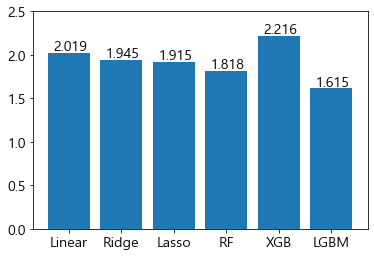

In [37]:
lr_pred = lr_model.predict(X_test2)
Ridge_pred = linear_models['Ridge'].predict(X_test)
Lasso_pred = linear_models['Lasso'].predict(X_test)
RF_pred = RF_models['RF'].predict(X_test)
XGB_pred = XGB_models['XGB'].predict(X_test)
LGBM_pred = LGBM_models['LGBM'].predict(X_test)

# test 데이터의 MSE 계산
mse_score = [MAE_func(y_test, lr_pred),
             MAE_func(y_test, Ridge_pred),
             MAE_func(y_test, Lasso_pred),
             MAE_func(y_test, RF_pred),
             MAE_func(y_test, XGB_pred),
             MAE_func(y_test, LGBM_pred)]

x_lab = ['Linear','Ridge','Lasso','RF','XGB','LGBM']

plt.bar(x_lab, mse_score)
# plt.title('MAE of Q3', fontsize=20)
# plt.xlabel('model', fontsize=18)
plt.ylabel('',fontsize=30)
plt.ylim(0.0, 2.5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
for i, v in enumerate(mse_score) :
    plt.text(i-0.3, v+0.03, str(np.round(v,3)), fontsize=14)
    
plt.show()

In [38]:
df_predict = pd.read_csv('최종데이터/전체데이터_독립+종속_20.csv')
df_predict

,police,year,범죄발생_강도,범죄발생_살인,범죄발생_강간/강제추행,범죄검거_강간/강제추행,범죄검거_강도,범죄검거_살인,acc_case,경찰 수,...,1인_남성비율,1인_1230비율,1인_450비율,1인_60이상비율,rob_safety_q1,mur_safety_q2,ta_safety_q3,law_order_q4,overall_q5,천명당_범죄발생_강도살인
0,마산동부경찰서,6,0,0,5,7,0,0,32,185,...,0.478467,0.200656,0.335004,0.464339,NaN,NaN,NaN,NaN,NaN,0.000000
1,마산중부경찰서,6,0,0,3,4,0,1,48,142,...,0.457956,0.210154,0.292077,0.497769,NaN,NaN,NaN,NaN,NaN,0.000000
2,서울강남경찰서,6,0,0,28,36,0,0,182,421,...,0.426766,0.532972,0.266761,0.200238,NaN,NaN,NaN,NaN,NaN,0.000000
3,서울강동경찰서,6,1,0,10,13,2,0,101,393,...,0.473348,0.395381,0.298235,0.306384,NaN,NaN,NaN,NaN,NaN,0.002174
4,서울강북경찰서,6,0,0,12,16,0,0,92,347,...,0.458750,0.326803,0.296421,0.376776,NaN,NaN,NaN,NaN,NaN,0.000000
5,서울강서경찰서,6,0,1,20,25,0,1,131,500,...,0.454185,0.493153,0.244940,0.261906,NaN,NaN,NaN,NaN,NaN,0.001724
6,서울관악경찰서,6,1,1,26,32,1,1,122,493,...,0.523589,0.669249,0.183753,0.146998,NaN,NaN,NaN,NaN,NaN,0.004040
7,서울광진경찰서,6,0,0,16,20,0,1,72,380,...,0.474631,0.574260,0.235598,0.190141,NaN,NaN,NaN,NaN,NaN,0.000000
8,서울구로경찰서,6,0,0,15,14,0,1,110,395,...,0.492143,0.428008,0.282200,0.289792,NaN,NaN,NaN,NaN,NaN,0.000000
9,서울금천경찰서,6,0,0,10,12,0,0,66,274,...,0.539684,0.455379,0.284736,0.259886,NaN,NaN,NaN,NaN,NaN,0.000000


In [39]:
df_predict = df_predict[yay]

In [40]:
df_predict2 = df_predict.iloc[:,2:]
df_predict2

,year,경찰 수/면적,남성비율,외국인_남성비율,기초생활수급_비율,천명당_유흥업소수,천명당_cctv수,천명당_교통사고수,천명당_신고_교통불편,면적당_보안등수,천명당_신고_교통사고,천명당_신고_교통위반,천명당_보안등수,천명당_공원수
0,6,2.003503,0.501534,0.537064,0.032035,1.751277,6.367329,0.167286,0.878252,61.155591,1.636268,0.324117,29.520777,0.339800
1,6,0.605026,0.497496,0.583539,0.034874,2.760136,5.184502,0.273168,0.643083,29.062562,1.223565,0.313005,38.818320,0.313005
2,6,34.607520,0.478456,0.497090,0.023415,1.101571,11.479332,0.675037,1.554068,413.399562,2.833670,0.730672,18.652523,0.089016
3,6,16.761537,0.491806,0.455746,0.025845,0.463074,5.528621,0.219580,0.391330,319.876653,0.960932,0.221754,16.305411,0.156532
4,6,14.645660,0.487390,0.374614,0.057960,0.594050,7.462953,0.298648,0.506403,355.843118,0.938144,0.152570,27.368489,0.133093
5,6,13.055378,0.482663,0.433610,0.042357,0.494670,4.096969,0.225790,0.420556,223.847505,1.065177,0.251644,14.776321,0.239579
6,6,16.673374,0.501634,0.455345,0.033984,0.547408,9.746293,0.246435,0.527209,401.851979,0.957460,0.218155,24.001131,0.157557
7,6,17.349773,0.482604,0.440146,0.029580,0.268257,18.630907,0.207683,0.623049,416.942446,1.286482,0.490363,26.341143,0.098073
8,6,19.629189,0.493741,0.542228,0.025811,0.262112,9.047793,0.272003,0.788807,387.813147,1.026191,0.257166,19.297343,0.111274
9,6,21.155319,0.505867,0.533855,0.044978,0.509207,18.236505,0.284811,0.824224,483.329561,1.406791,0.353856,27.013848,0.215766


In [41]:
# scaler적용
df_predict2_scaled  = scaler.transform(df_predict2)
df_predict2_scaled = pd.DataFrame(df_predict2_scaled, index=df_predict2.index, columns=df_predict2.columns)
df_predict2_scaled

,year,경찰 수/면적,남성비율,외국인_남성비율,기초생활수급_비율,천명당_유흥업소수,천명당_cctv수,천명당_교통사고수,천명당_신고_교통불편,면적당_보안등수,천명당_신고_교통사고,천명당_신고_교통위반,천명당_보안등수,천명당_공원수
0,2.04939,-1.229674,0.889780,0.583997,0.644545,1.295607,-0.439121,-0.993768,0.001085,-1.199226,-0.051622,-0.616581,0.267494,0.289899
1,2.04939,-1.349040,0.536435,1.236107,0.963650,2.639607,-0.653197,-0.522495,-0.430950,-1.356831,-0.466199,-0.651482,0.923584,0.168911
2,2.04939,1.553217,-1.129477,0.023096,-0.324341,0.430070,0.486085,1.266192,1.242641,0.530604,1.151219,0.660357,-0.499434,-0.842478
3,2.04939,0.029987,0.038580,-0.557016,-0.051190,-0.420534,-0.590916,-0.761014,-0.893452,0.071323,-0.730025,-0.938091,-0.665060,-0.537619
4,2.04939,-0.150612,-0.347785,-1.695414,3.558378,-0.246048,-0.240827,-0.409086,-0.682048,0.247951,-0.752917,-1.155388,0.115616,-0.643454
5,2.04939,-0.286350,-0.761379,-0.867612,1.804664,-0.378442,-0.850026,-0.733371,-0.839761,-0.400265,-0.625306,-0.844209,-0.772962,-0.162634
6,2.04939,0.022462,0.898514,-0.562641,0.863540,-0.308184,0.172428,-0.641483,-0.643825,0.473895,-0.733513,-0.949393,-0.122005,-0.532992
7,2.04939,0.080195,-0.766597,-0.775907,0.368631,-0.680068,1.780427,-0.813964,-0.467755,0.548002,-0.402997,-0.094423,0.043120,-0.801583
8,2.04939,0.274753,0.207928,0.656443,-0.055079,-0.688255,0.046009,-0.527683,-0.163237,0.404952,-0.664470,-0.826865,-0.453932,-0.741975
9,2.04939,0.405015,1.268847,0.538957,2.099283,-0.359076,1.709046,-0.470675,-0.098171,0.874022,-0.282141,-0.523175,0.090590,-0.270159


In [42]:
df_predict2_scaled['LGBM_예측점수'] = LGBM_models['LGBM'].predict(df_predict2_scaled)
df_predict2_scaled

,year,경찰 수/면적,남성비율,외국인_남성비율,기초생활수급_비율,천명당_유흥업소수,천명당_cctv수,천명당_교통사고수,천명당_신고_교통불편,면적당_보안등수,천명당_신고_교통사고,천명당_신고_교통위반,천명당_보안등수,천명당_공원수,LGBM_예측점수
0,2.04939,-1.229674,0.889780,0.583997,0.644545,1.295607,-0.439121,-0.993768,0.001085,-1.199226,-0.051622,-0.616581,0.267494,0.289899,68.601832
1,2.04939,-1.349040,0.536435,1.236107,0.963650,2.639607,-0.653197,-0.522495,-0.430950,-1.356831,-0.466199,-0.651482,0.923584,0.168911,70.531281
2,2.04939,1.553217,-1.129477,0.023096,-0.324341,0.430070,0.486085,1.266192,1.242641,0.530604,1.151219,0.660357,-0.499434,-0.842478,69.053855
3,2.04939,0.029987,0.038580,-0.557016,-0.051190,-0.420534,-0.590916,-0.761014,-0.893452,0.071323,-0.730025,-0.938091,-0.665060,-0.537619,70.558100
4,2.04939,-0.150612,-0.347785,-1.695414,3.558378,-0.246048,-0.240827,-0.409086,-0.682048,0.247951,-0.752917,-1.155388,0.115616,-0.643454,70.447073
5,2.04939,-0.286350,-0.761379,-0.867612,1.804664,-0.378442,-0.850026,-0.733371,-0.839761,-0.400265,-0.625306,-0.844209,-0.772962,-0.162634,70.641796
6,2.04939,0.022462,0.898514,-0.562641,0.863540,-0.308184,0.172428,-0.641483,-0.643825,0.473895,-0.733513,-0.949393,-0.122005,-0.532992,67.402206
7,2.04939,0.080195,-0.766597,-0.775907,0.368631,-0.680068,1.780427,-0.813964,-0.467755,0.548002,-0.402997,-0.094423,0.043120,-0.801583,69.657084
8,2.04939,0.274753,0.207928,0.656443,-0.055079,-0.688255,0.046009,-0.527683,-0.163237,0.404952,-0.664470,-0.826865,-0.453932,-0.741975,69.586356
9,2.04939,0.405015,1.268847,0.538957,2.099283,-0.359076,1.709046,-0.470675,-0.098171,0.874022,-0.282141,-0.523175,0.090590,-0.270159,67.580454


In [43]:
df_predict2_scaled['police'] = df_predict['police']
df_rf_model = df_predict2_scaled[['police','LGBM_예측점수']]
df_rf_model

,police,LGBM_예측점수
0,마산동부경찰서,68.601832
1,마산중부경찰서,70.531281
2,서울강남경찰서,69.053855
3,서울강동경찰서,70.558100
4,서울강북경찰서,70.447073
5,서울강서경찰서,70.641796
6,서울관악경찰서,67.402206
7,서울광진경찰서,69.657084
8,서울구로경찰서,69.586356
9,서울금천경찰서,67.580454


In [44]:
df_rf_model.columns = ['경찰서명','LGBM_예측점수']

In [45]:
df_rf_model

,경찰서명,LGBM_예측점수
0,마산동부경찰서,68.601832
1,마산중부경찰서,70.531281
2,서울강남경찰서,69.053855
3,서울강동경찰서,70.558100
4,서울강북경찰서,70.447073
5,서울강서경찰서,70.641796
6,서울관악경찰서,67.402206
7,서울광진경찰서,69.657084
8,서울구로경찰서,69.586356
9,서울금천경찰서,67.580454


In [46]:
df_rf_model.to_csv('교통사고안전도_예측점수2.csv',encoding='utf-8-sig')

In [47]:
df_rf_model_order = df_rf_model.sort_values(by = 'LGBM_예측점수', ascending=False)

In [48]:
df_rf_model_order

,경찰서명,LGBM_예측점수
16,서울방배경찰서,71.654336
28,서울종로경찰서,71.561986
23,서울수서경찰서,71.481320
20,서울성동경찰서,71.476852
15,서울마포경찰서,71.149425
19,서울서초경찰서,71.143656
11,서울노원경찰서,71.098503
12,서울도봉경찰서,70.823572
27,서울은평경찰서,70.667441
37,진주경찰서,70.661411


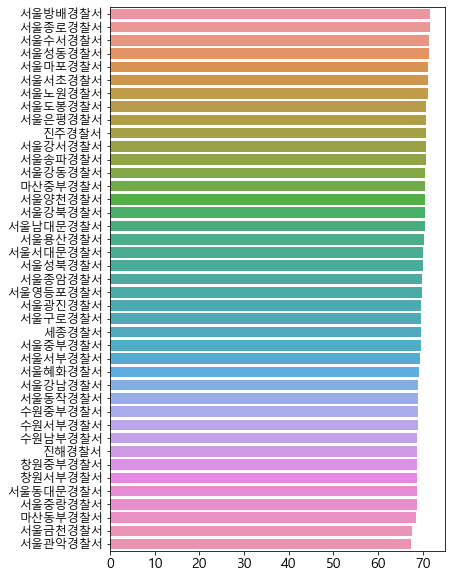

In [49]:
# 예측 시각화
plt.figure(figsize=(6,10))
sns.barplot(y='경찰서명',x='LGBM_예측점수', data = df_rf_model_order)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.xlabel('')
plt.ylabel('')
plt.xlim(0,75)
plt.show()

In [50]:
# 독립변수 계수 상위 10개, 하위 10개 추출함수
def get_top_bottom_coef(model, features) :
    coef = pd.Series(model.coef_, index= features.columns)
    
    coef_high = coef.sort_values(ascending=False).head(6)
    coef_low = coef.sort_values(ascending=False).tail(6)
    
    return coef_high, coef_low

In [61]:
# 계수를 시각화 - 모델별로 그림을 그린다. 
def visualize_coefficient(models, features=X_test2) :
    fig, axes = plt.subplots(figsize=(24,10), nrows=1, ncols=3)
    fig.tight_layout()
    pal = 'pastel'
    for idx, model in enumerate(models) :
        if model != lr_model :
            features = X_test
        coef_high, coef_low = get_top_bottom_coef(model, features)
        coef_concat = pd.concat([coef_high, coef_low])
        
        axes[idx].set_title(model.__class__.__name__+' 변수중요도', size=25)
        axes[idx].tick_params(axis='y', direction='in', pad=-300)
        axes[idx].set_xlim(-1.5,1.5)
        for label in (axes[idx].get_xticklabels() + axes[idx].get_yticklabels()) :
            label.set_fontsize(22)
    
        sns.barplot(x=coef_concat.values, y = coef_concat.index, ax = axes[idx], palette=pal)

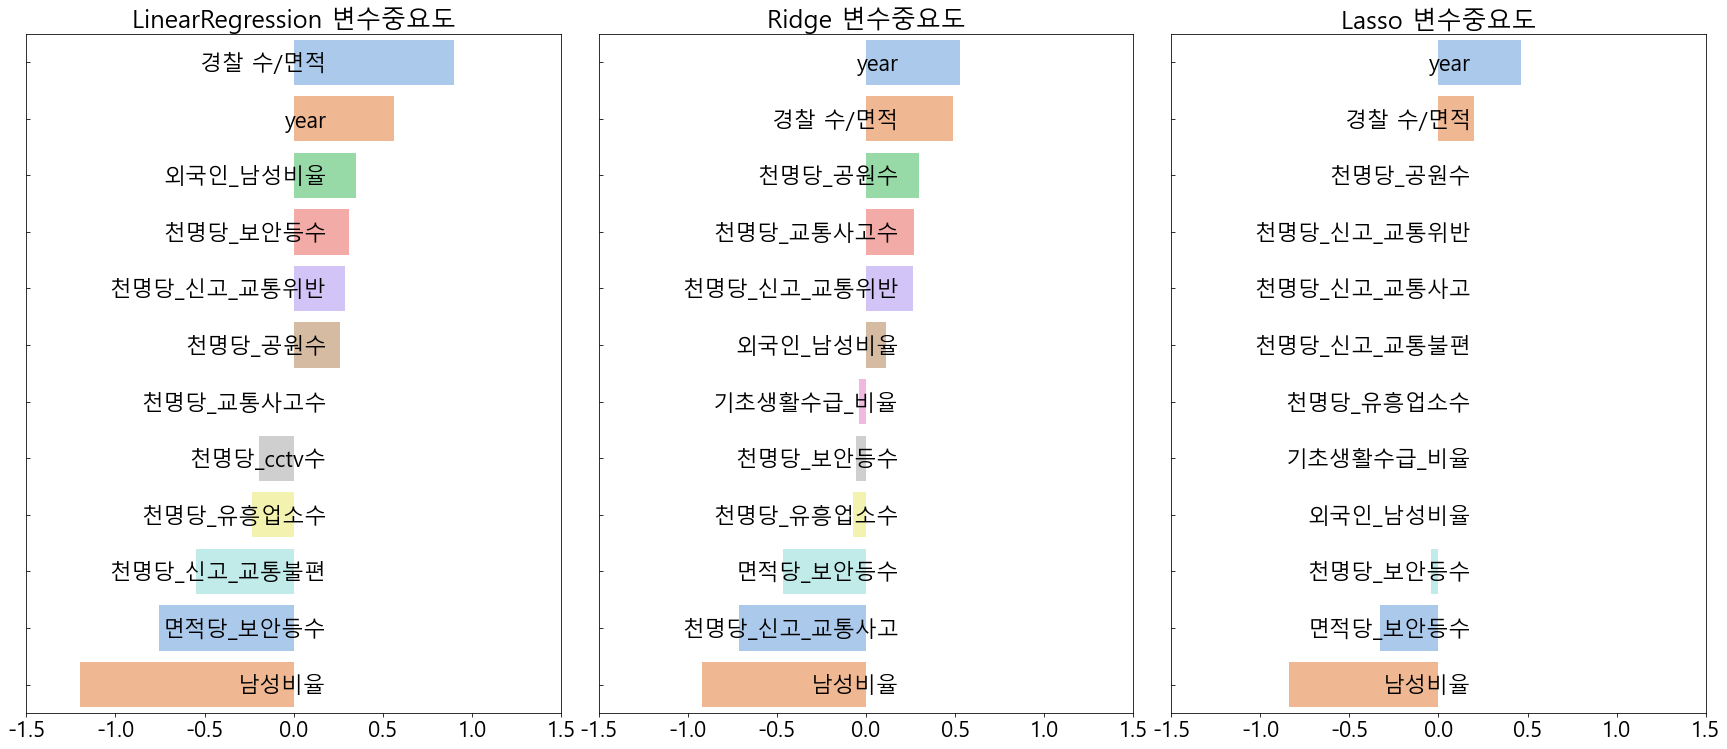

In [62]:
models = [lr_model, linear_models['Ridge'], linear_models['Lasso']]
visualize_coefficient(models, X_test2)

In [53]:
features = X_train.columns.values

In [54]:
x,y = (list(x) for x in zip(*sorted(zip(RF_models['RF'].feature_importances_, features), reverse=True)))

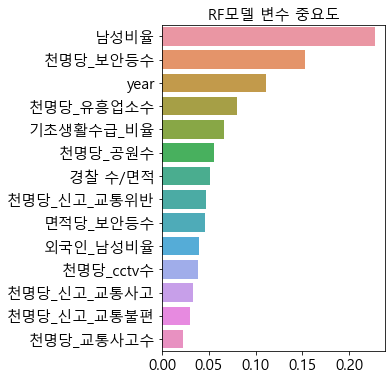

In [55]:
plt.figure(figsize=(4,6))
sns.barplot(x=x,y=y)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title('RF모델 변수 중요도',fontsize=15)
plt.show()

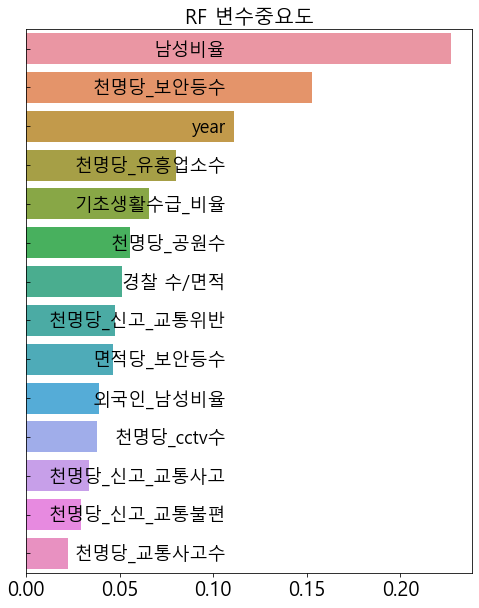

In [56]:
fig, ax = plt.subplots(figsize=(8,10), nrows=1, ncols=1)
sns.barplot(x=x,y=y)
ax.tick_params(axis='y', direction='in', pad=-200)
plt.title('RF 변수중요도',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=18)
plt.show()

In [57]:
x,y = (list(x) for x in zip(*sorted(zip(XGB_models['XGB'].feature_importances_, features), reverse=True)))

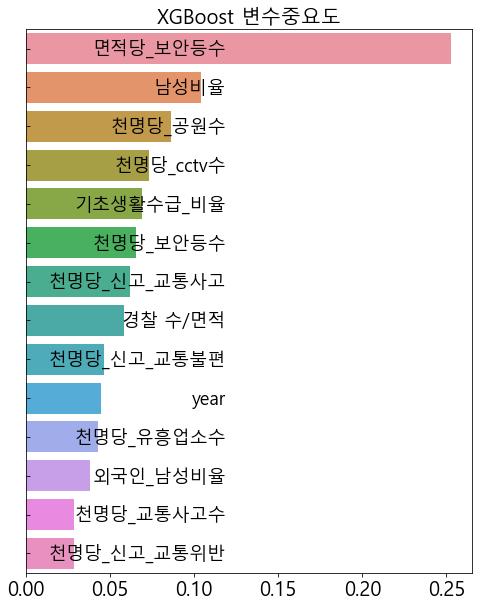

In [58]:
fig, ax = plt.subplots(figsize=(8,10), nrows=1, ncols=1)
sns.barplot(x=x,y=y)
ax.tick_params(axis='y', direction='in', pad=-200)
plt.title('XGBoost 변수중요도',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=18)
plt.show()

In [59]:
x,y = (list(x) for x in zip(*sorted(zip(LGBM_models['LGBM'].feature_importances_, features), reverse=True)))

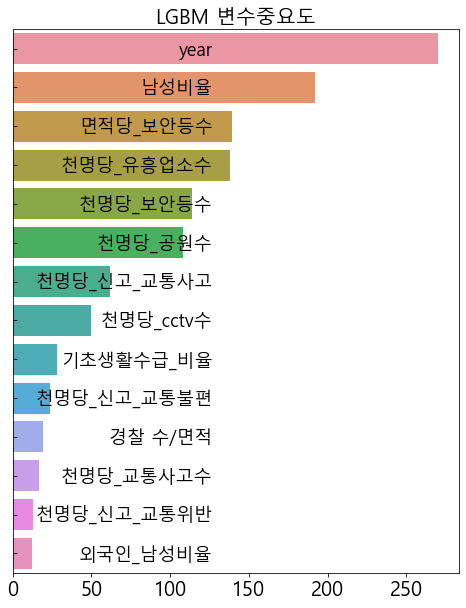

In [63]:
fig, ax = plt.subplots(figsize=(8,10), nrows=1, ncols=1)
sns.barplot(x=x,y=y)
ax.tick_params(axis='y', direction='in', pad=-200)
plt.title('LGBM 변수중요도',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=18)
plt.show()